## Kaggle Competition: House Price Prediciton Advanced Regression

1. Load Data, Combine train & test set
2. Correlation
3. Combining Train & Test Dataset
4. Missing or Zero Values
5. Distribution
6. Log Transformation
7. Split Train & Test set
8. Remove outliers
9. Model Training
10. Evaluate model
11. Predict on test.csv
12. Submission on Kaggle

### 1. Load Data, Combine train & test set

In [171]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split

In [172]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [16]:
train_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


### 2. Correlation

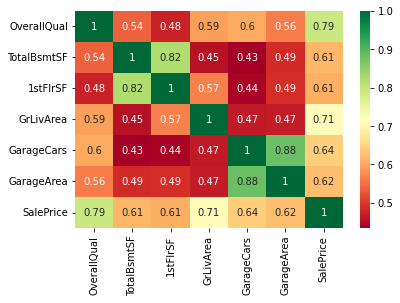

In [17]:
# most correlated features
corr = train_df.corr()
top_corr_features = corr.index[abs(corr["SalePrice"])>0.6]
# top_corr_features = corr.index[abs(corr["SalePrice"])>0.4]
plt.figure(figsize=(6,4))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Choose the top 4 correlated features

In [18]:
train_df = train_df[['SalePrice','OverallQual', 'TotalBsmtSF','GrLivArea', 'GarageCars']]

In [20]:
test_df = test_df[['OverallQual', 'TotalBsmtSF','GrLivArea', 'GarageCars']]

### 3. Combining Train & Test Dataset

In [19]:
train_df.shape

(1460, 5)

In [21]:
test_df.shape

(1459, 4)

In [22]:
final_df = pd.concat([train_df,test_df],axis=0)

In [23]:
final_df.to_csv('check1.csv',index=False)

In [24]:
final_df.shape

(2919, 5)

### 4. Missing or Zero Values

In [27]:
print(final_df.isnull().sum())

SalePrice      1459
OverallQual       0
TotalBsmtSF       1
GrLivArea         0
GarageCars        1
dtype: int64


In [28]:
num_features=['SalePrice','OverallQual', 'TotalBsmtSF','GrLivArea', 'GarageCars']

for feature in num_features:
    count = (final_df[feature] == 0).sum()
    print("Count of zeros in {} is {}".format(feature, count))

Count of zeros in SalePrice is 0
Count of zeros in OverallQual is 0
Count of zeros in TotalBsmtSF is 78
Count of zeros in GrLivArea is 0
Count of zeros in GarageCars is 157


c:\users\ngloo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GarageCars', ylabel='Density'>

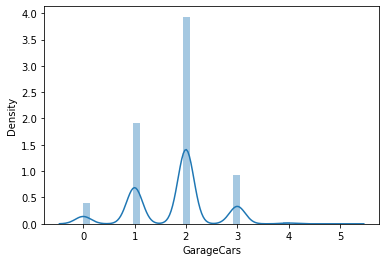

In [29]:
sns.distplot(final_df['GarageCars'])

In [32]:
final_df['GarageCars']=final_df['GarageCars']+1

c:\users\ngloo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GarageCars', ylabel='Density'>

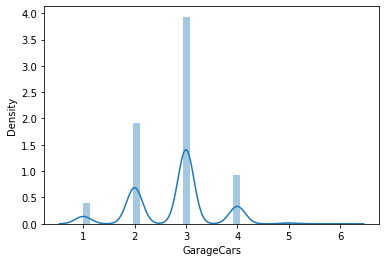

In [33]:
sns.distplot(final_df['GarageCars'])

In [34]:
final_df['TotalBsmtSF']=final_df['TotalBsmtSF']+1

c:\users\ngloo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

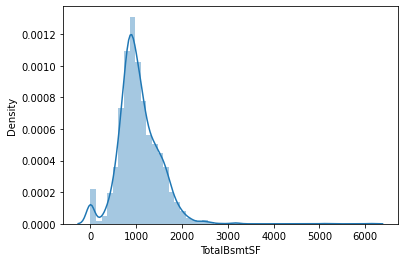

In [35]:
sns.distplot(final_df['TotalBsmtSF'])

### 5. Distribution

c:\users\ngloo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

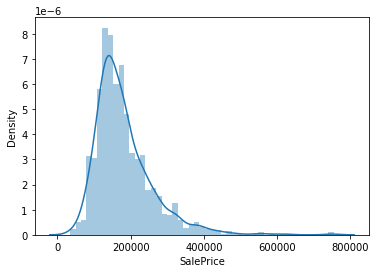

In [36]:
sns.distplot(final_df['SalePrice'])

In [37]:
final_df['SalePrice'].skew()

1.8828757597682129

### 6. Log Transformation

In [141]:
final_df_log = final_df.copy()

In [142]:
num_features=['SalePrice','OverallQual', 'TotalBsmtSF','GrLivArea', 'GarageCars']

final_df_log = np.log(final_df_log[num_features])
    
final_df_log.head(5)

,SalePrice,OverallQual,TotalBsmtSF,GrLivArea,GarageCars
0,12.247694,1.945910,6.753438,7.444249,1.098612
1,12.109011,1.791759,7.141245,7.140453,1.098612
2,12.317167,1.945910,6.825460,7.487734,1.098612
3,11.849398,1.945910,6.629363,7.448334,1.386294
4,12.429216,2.079442,7.044033,7.695303,1.386294


c:\users\ngloo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

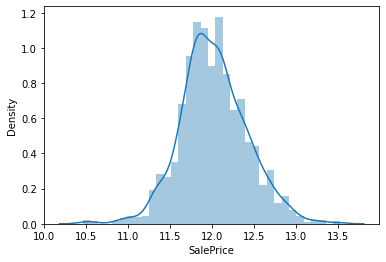

In [143]:
sns.distplot(final_df_log['SalePrice'])

In [41]:
final_df_log['SalePrice'].skew()

0.12133506220520401

In [42]:
final_df_log.to_csv('check2.csv',index=False)

### 7. Split Train & Test set

In [144]:
df_Train=final_df_log.iloc[:1460,:]
df_Test=final_df_log.iloc[1460:,:]

In [145]:
df_Train.head()

,SalePrice,OverallQual,TotalBsmtSF,GrLivArea,GarageCars
0,12.247694,1.945910,6.753438,7.444249,1.098612
1,12.109011,1.791759,7.141245,7.140453,1.098612
2,12.317167,1.945910,6.825460,7.487734,1.098612
3,11.849398,1.945910,6.629363,7.448334,1.386294
4,12.429216,2.079442,7.044033,7.695303,1.386294


In [64]:
df_Test.head()

,SalePrice,OverallQual,TotalBsmtSF,GrLivArea,GarageCars
0,NaN,1.609438,6.783325,6.797940,0.693147
1,NaN,1.791759,7.192934,7.192182,0.693147
2,NaN,1.609438,6.834109,7.395722,1.098612
3,NaN,1.791759,6.831954,7.380256,1.098612
4,NaN,2.079442,7.155396,7.154615,1.098612


In [65]:
df_Train.shape

(1460, 5)

In [165]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

c:\users\ngloo\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [166]:
df_Test.shape

(1459, 4)

In [68]:
df_Test.head()

,OverallQual,TotalBsmtSF,GrLivArea,GarageCars
0,1.609438,6.783325,6.797940,0.693147
1,1.791759,7.192934,7.192182,0.693147
2,1.609438,6.834109,7.395722,1.098612
3,1.791759,6.831954,7.380256,1.098612
4,2.079442,7.155396,7.154615,1.098612


### 8. Remove outliers

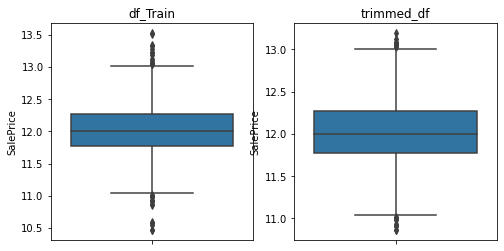

In [146]:
# Find the mean and standard dev
std = df_Train['SalePrice'].std()
mean = df_Train['SalePrice'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = df_Train[(df_Train['SalePrice'] < upper) & (df_Train['SalePrice'] > lower)]

# Compare the origional and transformed column
f,ax = plt.subplots(1,2,figsize=(8,4))
sns.boxplot(y='SalePrice',data=df_Train,ax=ax[0]).set(title='df_Train')
sns.boxplot(y='SalePrice',data=trimmed_df,ax=ax[1]).set(title='trimmed_df')
plt.show()

In [158]:
print(len(df_Train))

1460


In [147]:
print(len(trimmed_df))

1448


### 9. Model Training

In [153]:
X = trimmed_df[['OverallQual', 'TotalBsmtSF','GrLivArea', 'GarageCars']]
y = trimmed_df['SalePrice']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [155]:
print(len(X_train))
print(len(X_test))

1013
435


In [156]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

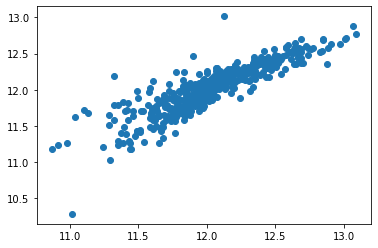

In [157]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

### 10. Evaluate model

In [159]:
lm.coef_

array([0.716395  , 0.03860688, 0.38397286, 0.28302045])

In [160]:
r_sq = lm.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7679576729300763


In [161]:
r_sq = lm.score(X_test, y_test)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7777134955421001


### 11. Predict on test.csv

In [162]:
df_Test['TotalBsmtSF'].fillna(value=0, inplace=True)
df_Test['GarageCars'].fillna(value=0, inplace=True)

c:\users\ngloo\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [167]:
df_Test.isnull().sum()

OverallQual    0
TotalBsmtSF    0
GrLivArea      0
GarageCars     0
dtype: int64

In [168]:
y_pred = lm.predict(df_Test)

In [169]:
y_pred = np.exp(y_pred)

### 12. Submission on Kaggle

In [170]:
## Update Sample Submission file with result in y_pred
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)